# Multiple Linear Regression - Sales Revenue

## Introduction

That many aspects of sales have changed dramatically in just a few years is an indisputable fact. Technological changes have led us to a very different landscape for business relationships. It is worth highlighting the preponderant role that Machine Learning and Artificial Intelligence solutions have acquired in this new juncture.

One only has to look at the figures to be aware of the advantages that the inclusion of these technologies brings to sales teams. According to Harvard Business Review, the implementation of Artificial Intelligence has increased leads by 50%, reduced costs by 40-60% and decreased the time spent on customer calls by 60-70%.

## Objetive

We are going to use mltiple linear regression model to predict sells revenue
by build linear regresion model with scikit learn, conduct an exploratory data analysis and undertand how to interpret the regresion coeficients. 

## Data

The advertising dataset we are using captures sales revenue generated with respect to advertisement spends across multiple media types such as radio, tv and newspaper. It was downloaded from the author of Introduction to Statistical Learning foundational text book for statistical and machine learning. A quick clarification, Sales are in thousands of units.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

Simple linear regression is a useful aproach for predicting the response on the basis of a single predictor variable. However, in practice we often have more than 1 predictor. For example in our case, I already use a single linear regression model to look after the relationship between sales and tv advertising but we also have other data, right? 

We also have data for the amount of money spent on radio and newspapers. We want to know wether either of this media is associated to sales revenue, so the question is, how can we extend our analysis of the advertising data in order to acomodate this 2 additional predictors. An option is to run three separate linear regressions, each of wich uses a different advertisement media as a predictor. However this approach of fitting separate models for each predictors is not satisfactory to me. 

First of all, its unclear how to make a single prediction of sales giving us 3 advertisements media budgets, since each of the budgets its associated with a separate regression equation. The second reason is that each of the 3 single regression equations ignores the other 2 media types. So we are going to work with a multiple linear regression since the media budgets are correlated with each other in the 200 different markets that constitute our dataset.

In [2]:
ad = pd.read_csv('Advertising.csv')
ad.head(5)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Relationship betwwen Features and Response

One good first step is to get to see the relationship of the features and response variable to know how are we going to proceed.

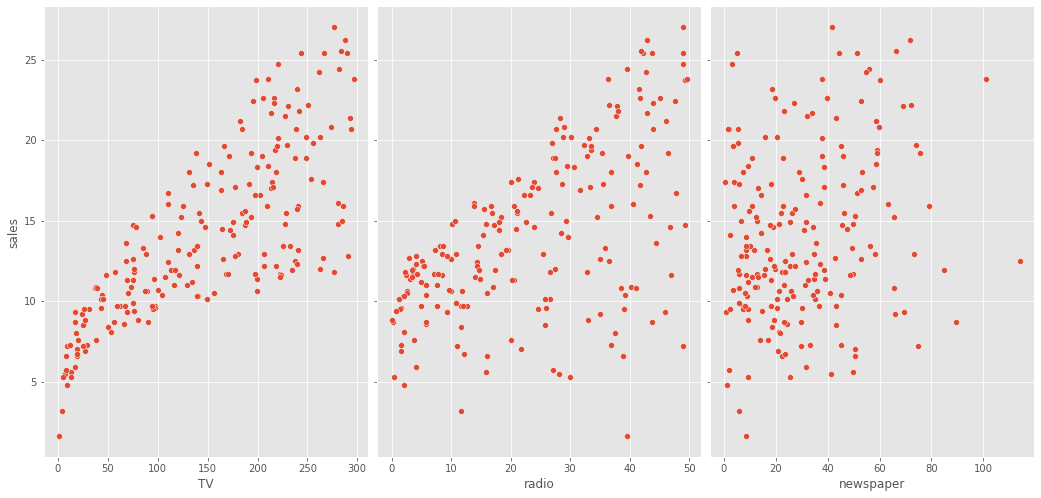

In [4]:
sns.pairplot(ad, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', diag_kind=None, height=7, aspect=0.7);

In an ideal case what do we want to see since we are using a linear regresion model which assumes linear over predictors. Since we are using this model we want the relationship to be linear so what we expect is that we have a diagonal across the plots from left to right. In our subplots we see that the most linear caracteristic is tv, and newspaper the least. However this is just qualitative analysis, now we are going to quantify the relationship with a multiple regresssion model.

## Multiple Linear Regression Model

In [5]:
from sklearn.linear_model import LinearRegression

X= ad[['TV', 'radio', 'newspaper']]
y=ad.sales

lm1=LinearRegression()
lm1.fit(X, y)

print('Intercept:')
print(lm1.intercept_)
print('Coefficients:')
print(lm1.coef_)

Intercept:
2.9388893694594067
Coefficients:
[ 0.04576465  0.18853002 -0.00103749]


In [6]:
list(zip(['TV', 'radio', 'newspaper'], lm1.coef_))

[('TV', 0.04576464545539761),
 ('radio', 0.18853001691820462),
 ('newspaper', -0.0010374930424762972)]

The table displays the multiple regression coefficients estimates when tv, radio, and newspaper advertisment budgets are use to predict part of sales revenue using the advertising data. We interpret this results as follows: for a given amount of any media advertisement, spending and additional thousand dollar on radio advertising leads to an increas in sales by approximately 188 units. Comparing this coefficient estimates with the single linear regression, this new model has similar values for tv and radio, however the coefficient for newpaper was significantly reduce to 0.

This sates that single to multiple regression models are quite different.

Correlatin matrix between features and response

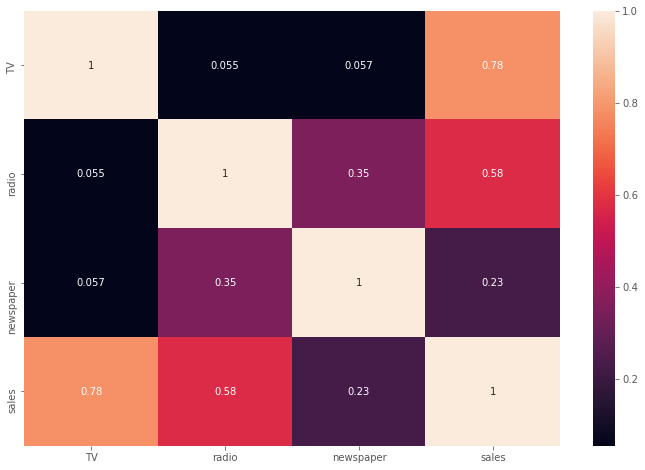

In [7]:
sns.heatmap(ad.corr(), annot=True);

Yuo can notice that the correlation between radio and newspaper is 0.35. This reveals a tendency to spend more on newspaper advertising in markets were more spent on radio advertising

## Feature Selection

We usually interested in answering a few important questions: 

* It's at least one of oure predictors useful in predicting response? 
* Do all predictors help to explain the response or is it only a set of predictors that is useful?
* How well does the model fit the data? 
* Giving a set of predictor values, what response values should we predict and how accurate is our prediction?

It is possible that all of the predictors are associated to the response but it its more often the case that the response it is only related to a subset of the predictors. So we are going to determine wich predictors are associated with the response in order to fit a single model involving only those predictors, this is called feature selection or variable selection. Idealy we would want to try different models, each with a different selection of predictors and select the best model.

In [8]:
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(X[['TV', 'radio']], y)
lm2_pred = lm2.predict(X[['TV', 'radio']])

print('R²: ', r2_score(y, lm2_pred))

R²:  0.8971942610828956


In [9]:
lm3 = LinearRegression().fit(X[['TV', 'radio', 'newspaper']], y)
lm3_pred = lm3.predict(X[['TV', 'radio', 'newspaper']])

print('R²: ', r2_score(y, lm3_pred))

R²:  0.8972106381789522


An R² value close to 1 indicates that the model explains a large portion of the variance in the response variable which is sales. As we can see the model that uses all 3 advertises media to predict sales has an R² of 0.89721,  on the other hand the other model that only uses radio and tv to predict sales has an R² of 0.89719. In other words there is a small increase if we include the newspaper feature to the model. 

This discrepancy is due to the fact that adding another variable to the least squares equations must allows to fit the training data more accurately, this means that the R² statistic which is also computed on the training data must increase and the fact that adding newspaper advertaising to the model containing just radio and tv advertising leads to just a tiny increas in R² provides us additiona evidence that newspaper can actually being drop from the model , so actually adding the newspaper feature provides no improving to the model fit and its inclution will likely lead to poor results on independent test samples due to overfitting.

## Model Evaluation

We are going to calculate some values to evaluate our model:

* Mean absolute error
* Mean squared error 
* Root mean squared error

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = ad[['TV', 'radio', 'newspaper']]
y = ad.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lm4 = LinearRegression().fit(X_train, y_train)
lm4_pred = lm4.predict(X_test)

print('RMSE: ', np.sqrt(mean_squared_error(y_test, lm4_pred)))
print('R²: ', r2_score(y_test, lm4_pred))

RMSE:  1.4046514230328955
R²:  0.9156213613792232


In [12]:
X = ad[['TV', 'radio']]
y = ad.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lm5 = LinearRegression().fit(X_train, y_train)
lm5_pred = lm5.predict(X_test)

print('RMSE: ', np.sqrt(mean_squared_error(y_test, lm5_pred)))
print('R²: ', r2_score(y_test, lm5_pred))

RMSE:  1.3879034699382888
R²:  0.9176214942248908


The lower our RMSE value is the better is the model. As you can see R² value went up and the RMSE decreased which a good sign. This way now we are sure that its better to exclude newspaper from our features.

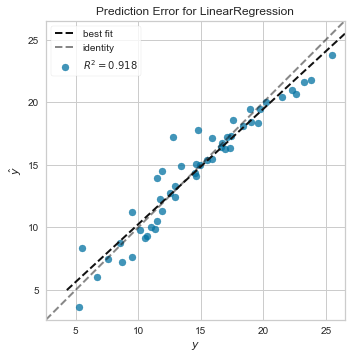

In [19]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(lm5).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

Here we see a prediction error plot for our multiple linear regression model.  Notice that altought our R² is high, there is still some unexplained variability in our data that our model is unable to capture and this either be a non linearity or a synergy effect that we are missing.

## Interaction Effect (Synergy)

The graph above suggest that this effect might actually be present in our advertising dataset. On way to extend our model (equation) to allow for interaction effects is to include a third predictor called interaction term constructed by computing the data of x1, x2 and so on. 

In [21]:
ad['interaction'] = ad['TV'] * ad['radio']

X = ad[['TV', 'radio', 'interaction']]
y = ad.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lm6 = LinearRegression().fit(X_train, y_train)
lm6_pred = lm6.predict(X_test)

print('RMSE: ', np.sqrt(mean_squared_error(y_test, lm6_pred)))
print('R²: ', r2_score(y_test, lm6_pred))

RMSE:  0.7011871137164326
R²:  0.9789736814681261


The R² value jumped from 0.91 to 0.97, we also have a dramatic decrease in the RMSE which is an amazing sign. Lets generate the prediction error plot for this model.

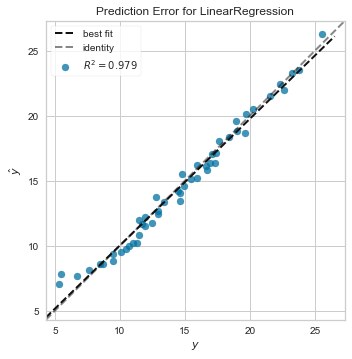

In [22]:
visualizer = PredictionError(lm6).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

As you can see, this model adds the interaction term and almost beautifly describes the data. Now you can see that the line of best fit is very close to almost all of the data points and explains by 97% the variavility in the data. To be clear our interaction term is also gonna have a coefficient, so we can interpret this coefficient as the increase in the effectifness of tv advertising for 1 unit increase on radio advertising and viceversa.

These results, a highest R² value and a lower RMSE suggest that this model that includes the interaction term is far superior to the other that only contains the main effects.

## Conclusions and Recommendations

Having at our disposal accurate information from our customers related to their purchase history of products or services is invaluable in predicting how sales will be in the future.

To get a clear view of the medium to long-term sales level, Machine Learning and Artificial Intelligence systems process historical sales data, such as prices, volumes or geographical distribution, and combine them to transform them into useful information. 

We have answer many questions by this time which include the relationship between the advertisement sales and the budget. We were able to answer that by fitting a multiple linear regression model of sales onto tv, radio and newspaper and testing our hypotesis. To test how strong our relationship is we disscused 2 measures of model accuracy which are the R² statistics and the RMSE. 

We also discover a synergy among the advertisement media. The standart linear regression model assumes an additive relationship between the predictors and the response, so an additive model is easier to interpret because the effect of each predictor on the response is unrelated to the values of other predictors. However, the additive assumptin may be unrealistic for certain datasets like the advertisement dataset we were working with. We showed how to include an interaction term into a regression model in order to accomodate this non additive relationships. Including this term resulted in a substantial improve in our model.